<a href="https://colab.research.google.com/github/hideraldus13/shareofsearch/blob/main/ShareOfSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Share of Search**

Ferramenta para comparar a pontuação na pesquisa Google entre diferentes marcas.

---

Passos para executar:

* Insira os valores das variáveis abaixo:

> MARCAS: marcas a serem pesquisadas 

> CORES: cores em que as marcas serão exibidas no gráfico

> DATAS: filtro do range de datas 

> CATEGORIA: filtro de categoria (todas as categorias disponíveis em: https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)

> DESC_CATEGORIA: descrição da categoria 

* Clique em 'Runtime' e 'Run All' (ou Ctrl + F9)



In [ ]:
MARCAS = ['wap', 'karcher', 'dewalt', 'bosch']
CORES = ['yellow', 'green', 'grey', 'red']
DATAS = '2020-01-01 2022-12-31'
CATEGORIA = 11
DESC_CATEGORIA = ''

In [ ]:
if len(MARCAS) != len(CORES):
  raise Exception("[ERRO] É necessário ter a mesma quantidade de marcas e cores!")

In [ ]:
! pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pytrends.request import TrendReq

pytrends = TrendReq(hl='pt-BR', tz=360)

In [ ]:
pytrends.build_payload(kw_list= MARCAS, timeframe= DATAS, geo= 'BR', cat= CATEGORIA)
df = pytrends.interest_over_time()
df

,wap,karcher,dewalt,bosch,isPartial
date,,,,,
2020-01-05,36,19,28,42,False
2020-01-12,28,21,24,50,False
2020-01-19,25,18,31,42,False
2020-01-26,30,17,29,43,False
2020-02-02,29,19,28,43,False
...,...,...,...,...,...
2022-09-04,56,14,36,51,False
2022-09-11,49,17,36,52,False
2022-09-18,44,18,35,48,False


Text(0, 0.5, 'Pontuação da Pesquisa')

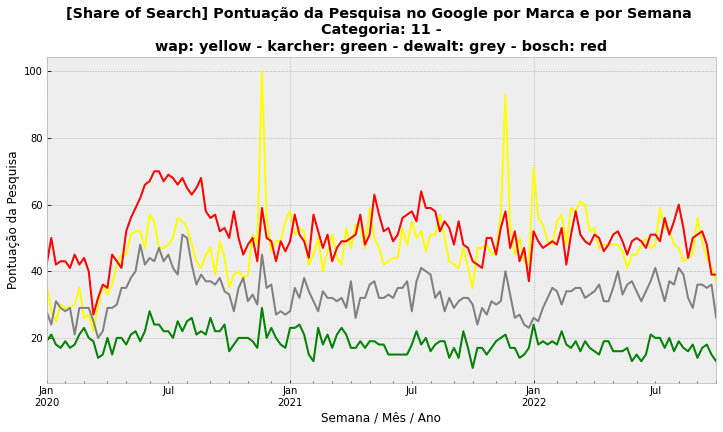

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
titulo = '[Share of Search] Pontuação da Pesquisa no Google por Marca e por Semana \n Categoria: ' + str(CATEGORIA) + ' - '+ DESC_CATEGORIA +'\n'
for i in range(len(MARCAS)):
  df[MARCAS[i]].plot(color= CORES[i])
  if i != 0:
    titulo = titulo + ' - '
  titulo += MARCAS[i] + ': ' + CORES[i]
plt.title(titulo, fontweight='bold')
plt.xlabel('Semana / Mês / Ano')
plt.ylabel('Pontuação da Pesquisa')

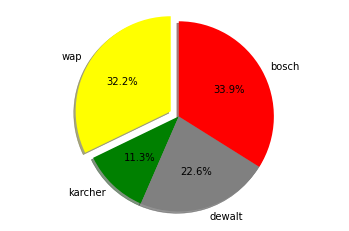

In [ ]:
labels = MARCAS
sizes = df.iloc[-1].to_list()
del sizes[-1] # retirando ultimo valor (TRUE/FALSE)

explode = [0.1]
for i in range(len(MARCAS)-1): #adicionando 0s para explode do grafico
  explode.append(0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=CORES, explode= explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()